In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelmin

In [2]:
with open("/local/ecw/deepscribe-detectron/data_nov_2020/hotspots_test.json") as inf:
    dataset = json.load(inf)

In [3]:
#x1, y1, x2, y2
bbox_set = [anno["bbox"] for anno in dataset[11]["annotations"]]

In [4]:
centroid_set = np.array([((bbox[0] + bbox[2])/2, (bbox[1] + bbox[3])/2) for bbox in bbox_set ])

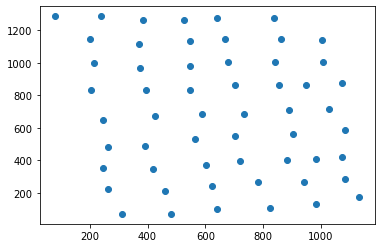

In [5]:
plt.scatter(centroid_set[:, 0], centroid_set[:, 1])

(array([6., 6., 7., 4., 4., 4., 7., 6., 6., 6.]),
 array([  71.5,  193. ,  314.5,  436. ,  557.5,  679. ,  800.5,  922. ,
        1043.5, 1165. , 1286.5]),
 <BarContainer object of 10 artists>)

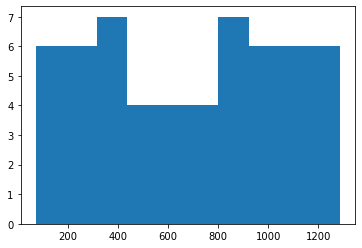

In [6]:
plt.hist(centroid_set[:, 1])

In [7]:
#Naive approach - simply cluster by y-values! 
# assumes data is well separated

y_vals = centroid_set[:, 1][:,np.newaxis]
X_plot = np.linspace(y_vals.min(), y_vals.max(), 1000)[:,np.newaxis]

In [8]:

kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(y_vals)
log_dens = kde.score_samples(X_plot)

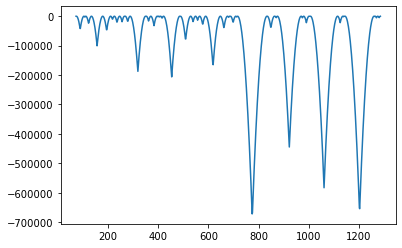

In [9]:
plt.plot(X_plot, log_dens)

In [10]:
bins, =  argrelmin(log_dens, order=100)

In [11]:
# append min and max values 
final_bins = np.zeros(bins.shape[0] + 2)
final_bins[0] = y_vals.min() - 1
final_bins[1:-1] = bins
final_bins[-1] = y_vals.max() + 1

In [12]:
final_bins

array([  70.5,   69. ,  203. ,  314. ,  450. ,  578. ,  700. ,  814. ,
        931. , 1287.5])

In [13]:
bin_assignments = np.digitize(y_vals, bins).flatten()

In [14]:
bin_assignments.shape

(56,)

In [15]:
unique_bins = np.unique(bin_assignments)

grouped_lines = []

for ind in unique_bins:

    points_in_bin = centroid_set[bin_assignments == ind,:]

    grouped_lines.append(points_in_bin)

(0.0, 1286.5)

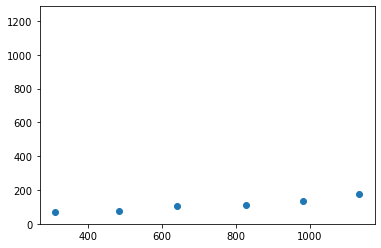

In [16]:
plt.scatter(grouped_lines[0][:, 0], grouped_lines[0][:, 1])
plt.ylim(0 , y_vals.max())

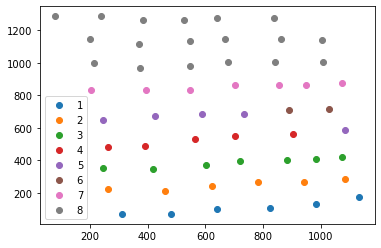

In [17]:
for ind in unique_bins:

    points_in_bin = centroid_set[bin_assignments == ind,:]

    plt.scatter(points_in_bin[:, 0], points_in_bin[:, 1], label=ind)



plt.legend()

In [18]:

def get_centroids(bboxes):
      #convert bboxes to centroids
    return np.array([((bbox[0] + bbox[2])/2, (bbox[1] + bbox[3])/2) for bbox in bboxes ])


def get_lines(centroids):
  
    # cluster by y-values

    y_vals = centroids[:, 1][:,np.newaxis]
    x_samples = np.linspace(y_vals.min(), y_vals.max(), 1000)[:,np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(y_vals)
    log_dens = kde.score_samples(x_samples)

    bins, =  argrelmin(log_dens, order=40)

    bin_assignments = np.digitize(y_vals, bins).flatten()

    return bin_assignments


def plot_lines(centroids, bin_assignments):
    unique_bins = np.unique(bin_assignments)

    for ind in unique_bins:
        points_in_bin = centroids[bin_assignments == ind,:]
        plt.scatter(points_in_bin[:, 0], points_in_bin[:, 1], label=ind)
    plt.legend()

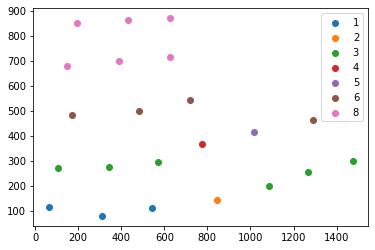

In [19]:
#x1, y1, x2, y2
bboxes_test = [anno["bbox"] for anno in dataset[15]["annotations"]]
centroids = get_centroids(bboxes_test)
line_ids = get_lines(centroids)

plot_lines(centroids, line_ids)

In [20]:
dataset[15]

{'file_name': '11e1c379-a4f1-7ae1-caf6-efdd59a7d163.jpg',
 'height': 935,
 'width': 1535,
 'image_id': '11e1c379-a4f1-7ae1-caf6-efdd59a7d163',
 'annotations': [{'bbox': [0.0, 42.0, 125.0, 188.0],
   'bbox_mode': 0,
   'sign': '10',
   'reading': '10',
   'sign_id': 59,
   'reading_id': 60,
   'category_id': 59},
  {'bbox': [207.0, 0.0, 410.0, 158.0],
   'bbox_mode': 0,
   'sign': 'MAR',
   'reading': 'mar',
   'sign_id': 82,
   'reading_id': 84,
   'category_id': 82},
  {'bbox': [435.0, 27.0, 653.0, 191.0],
   'bbox_mode': 0,
   'sign': 'RI',
   'reading': 'ri',
   'sign_id': 38,
   'reading_id': 39,
   'category_id': 38},
  {'bbox': [705.0, 63.0, 980.0, 224.0],
   'bbox_mode': 0,
   'sign': 'IŠ',
   'reading': 'iš',
   'sign_id': 7,
   'reading_id': 7,
   'category_id': 7},
  {'bbox': [1017.0, 129.0, 1154.0, 272.0],
   'bbox_mode': 0,
   'sign': 'GIŠ',
   'reading': 'GIŠ',
   'sign_id': 83,
   'reading_id': 85,
   'category_id': 83},
  {'bbox': [1170.0, 165.0, 1364.0, 347.0],
   'bbox

In [21]:
line_ids

array([1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 4, 5, 6, 6, 6, 8, 8, 8, 8, 8, 8, 6])

In [22]:
(3.5, 4) < (3, 5)

False

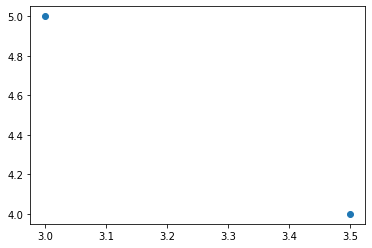

In [23]:
plt.scatter([3.5, 3], [4, 5])

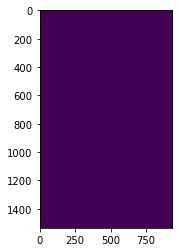

In [24]:
from skimage.transform import hough_line, hough_line_peaks
from matplotlib import cm

# produce "image" with the points highlighted

img = np.zeros((dataset[15]["width"], dataset[15]["height"]))
rounded_points = np.rint(centroids).astype(int)
for pt in rounded_points:
    img[pt[0], pt[1]] = 255

plt.imshow(img)


In [25]:
centroids

array([[  62.5,  115. ],
       [ 308.5,   79. ],
       [ 544. ,  109. ],
       [ 842.5,  143.5],
       [1085.5,  200.5],
       [1267. ,  256. ],
       [1475.5,  299.5],
       [ 107.5,  269.5],
       [ 341.5,  274. ],
       [ 572.5,  296.5],
       [ 776.5,  365.5],
       [1018. ,  416.5],
       [ 172. ,  481. ],
       [ 481. ,  500.5],
       [ 721. ,  542.5],
       [ 149.5,  679. ],
       [ 388. ,  700. ],
       [ 626.5,  713.5],
       [ 193. ,  848.5],
       [ 431.5,  862. ],
       [ 626.5,  869.5],
       [1291. ,  464.5]])

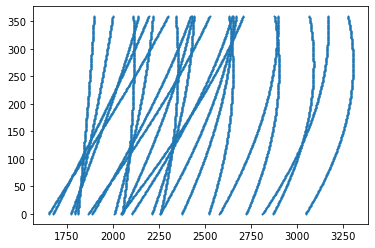

In [26]:
tested_angles = np.linspace(np.pi/2 + np.pi/8  , np.pi/2 - np.pi/8, 360, endpoint=False)
h, theta, d = hough_line(img, theta=tested_angles)

x_hough, y_hough = h.nonzero()
plt.scatter(x_hough, y_hough, s=1)

Text(0.5, 1.0, 'Detected lines')

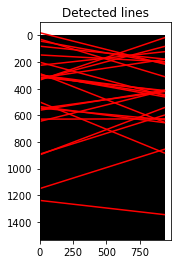

In [27]:
plt.imshow(img, cmap=cm.gray)
origin = np.array((0, img.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), '-r')

plt.title('Detected lines')

In [28]:
#RANSAC! 
from sklearn import linear_model

In [29]:
ransac = linear_model.RANSACRegressor(base_estimator=linear_model.Ridge(),residual_threshold=100, max_trials=5000)
ransac.fit(centroids[:,0].reshape(-1, 1), centroids[:,1])

RANSACRegressor(base_estimator=Ridge(), max_trials=5000, residual_threshold=100)

In [30]:
print(ransac.estimator_.coef_)
print(ransac.estimator_.intercept_)

[0.23056481]
177.16571735235084


In [31]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [32]:
line_X = np.arange(centroids[:,0].min(), centroids[:,0].max())
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

(29.0, 919.5)

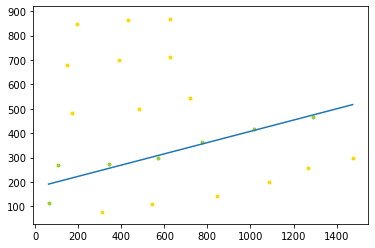

In [33]:

plt.scatter(centroids[inlier_mask,0], centroids[inlier_mask,1],color='yellowgreen', marker='.',label='Inliers')
plt.scatter(centroids[outlier_mask,0], centroids[outlier_mask,1],color='gold', marker='.',label='Outliers')
plt.plot(line_X, line_y_ransac)
plt.ylim((centroids[:,1].min() - 50, centroids[:,1].max() + 50))

In [34]:
remaining_points = centroids[outlier_mask,:]

In [35]:
ransac2 = linear_model.RANSACRegressor(base_estimator=linear_model.Ridge(),residual_threshold=100, max_trials=5000)
ransac2.fit(remaining_points[:,0].reshape(-1, 1), remaining_points[:,1])

RANSACRegressor(base_estimator=Ridge(), max_trials=5000, residual_threshold=100)

(29.0, 919.5)

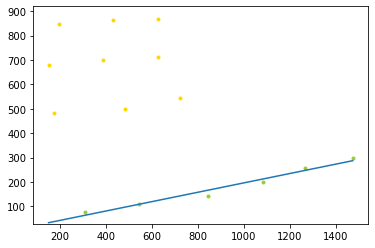

In [36]:
inlier_mask = ransac2.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(remaining_points[:,0].min(), remaining_points[:,0].max())
line_y_ransac = ransac2.predict(line_X.reshape(-1, 1))

plt.scatter(remaining_points[inlier_mask,0], remaining_points[inlier_mask,1],color='yellowgreen', marker='.',label='Inliers')
plt.scatter(remaining_points[outlier_mask,0], remaining_points[outlier_mask,1],color='gold', marker='.',label='Outliers')
plt.plot(line_X, line_y_ransac)
plt.ylim((centroids[:,1].min() - 50, centroids[:,1].max() + 50))

In [37]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [38]:
centroids = get_centroids([anno["bbox"] for anno in dataset[15]["annotations"]])

In [59]:
class SequentialRANSAC(BaseEstimator, ClusterMixin):
    def __init__(self, max_lines=20, residual_threshold=50, max_trials=5000, max_slope=0.15, base_estimator="ridge"):
        self.residual_threshold = residual_threshold
        self.max_trials = max_trials
        self.base_estimator = base_estimator
        self.max_slope = max_slope
        self.max_lines = max_lines

    def fit(self, X, y=None):

        self.labels_ = np.full((X.shape[0]), -1)

        fit_mask = np.full((X.shape[0]), True)

        inds = np.arange(0, X.shape[0])

        current_label = 0

        iters = 0

        self.ransac_lines = []
        
        while np.any(self.labels_ == -1) and iters < self.max_lines and np.sum(self.labels_ == -1) > 2:
            ransac_line = linear_model.RANSACRegressor(base_estimator=linear_model.Ridge(alpha=500),
                residual_threshold=self.residual_threshold, 
                is_model_valid=lambda m, _x, _y: np.abs(m.coef_) < self.max_slope,
                max_trials=self.max_trials)
            ransac_line.fit(X[fit_mask,0].reshape(-1, 1), X[fit_mask,1])

            self.ransac_lines.append(ransac_line)

            # use inlier mask and fit mask to index into true indices

            true_inds = inds[fit_mask][ransac_line.inlier_mask_]

            self.labels_[true_inds] = current_label 
            fit_mask[true_inds] = False
            current_label += 1
            iters += 1

        #POSTPROCESSING: assign any unassigned
        unassigned, = np.where(self.labels_ == -1) 
        # TODO: refactor and test this
        for unassigned_pt in unassigned:
            dists = []
            for fitted_line in self.ransac_lines:
                # compute distance from line to pt
                dist_to_line = np.abs(-fitted_line.estimator_.coef_[0]*X[unassigned_pt, 0] + X[unassigned_pt, 1] - fitted_line.estimator_.intercept_)/np.sqrt((fitted_line.estimator_.coef_[0]**2 + 1))

                dists.append(dist_to_line)

            # print(dists)
            # print(np.argmin(dists))
            
            self.labels_[unassigned_pt] = np.argmin(dists)


        # sort the lines and points

        # rough heuristic: sort the lines by y-intercept, then sort points by x_coordinate

        line_intercepts = [fitted_line.estimator_.intercept_ for fitted_line in self.ransac_lines]

        label_ordering = np.argsort(line_intercepts)[::-1]

        ordered_pts = []

        for label in label_ordering:
            label_points = X[self.labels_ == label]
            point_inds, = np.where(self.labels_ == label)
            label_points_sorted = np.argsort(label_points[:, 0]) # sort by x coordinate

            ordered_pts.append(point_inds[label_points_sorted])

        self.ordering_ = np.hstack(ordered_pts)

        return self

def plot_centroids(cnt, labels, ordering):
    # plt.figure(figsize=(10, 10))
    for lab in np.unique(labels):
        plt.scatter(cnt[labels == lab, 0], cnt[labels == lab, 1], label=f"Line {lab}")

    for i, pt_idx in enumerate(ordering):
        plt.annotate(str(i), (cnt[pt_idx, 0], cnt[pt_idx, 1]))
    # plt.legend()


In [61]:
rns = SequentialRANSAC()
rns.fit(centroids)

SequentialRANSAC()

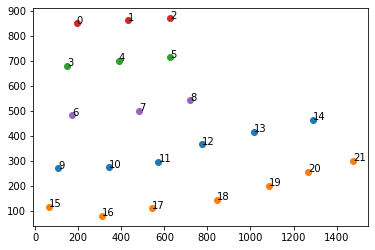

In [63]:
plot_centroids(centroids, rns.labels_, rns.ordering_)

In [64]:
centroids_2 = get_centroids([anno["bbox"] for anno in dataset[11]["annotations"]])

In [65]:
rns2 = SequentialRANSAC()
rns2.fit(centroids_2)

SequentialRANSAC()

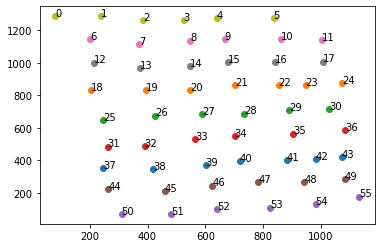

In [67]:
plot_centroids(centroids_2, rns2.labels_, rns2.ordering_)
# plt.legend()

In [160]:
centroids_3 = get_centroids([anno["bbox"] for anno in dataset[12]["annotations"]])
rns3 = SequentialRANSAC()
rns3.fit(centroids_3)
plot_centroids(centroids_3, rns3.labels_)


[]


SequentialRANSAC()

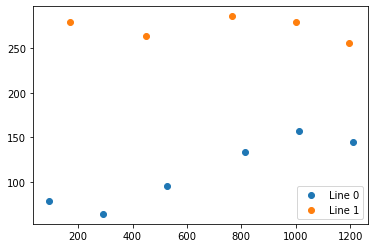

In [161]:
plot_centroids(centroids_3, rns3.labels_)
plt.legend()

[60.312163885729554]
0
[0]


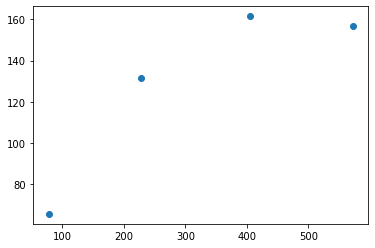

In [162]:
centroids_4 = get_centroids([anno["bbox"] for anno in dataset[24]["annotations"]])
rns4 = SequentialRANSAC()
rns4.fit(centroids_4)
plot_centroids(centroids_4, rns4.labels_)


In [163]:
dataset[24]["annotations"]

[{'bbox': [0.0, 0.0, 155.0, 131.0],
  'bbox_mode': 0,
  'sign': 'RA',
  'reading': 'ra',
  'sign_id': 5,
  'reading_id': 5,
  'category_id': 5},
 {'bbox': [126.0, 69.0, 329.0, 194.0],
  'bbox_mode': 0,
  'sign': 'DU',
  'reading': 'du',
  'sign_id': 43,
  'reading_id': 44,
  'category_id': 43},
 {'bbox': [318.0, 96.0, 491.0, 227.0],
  'bbox_mode': 0,
  'sign': 'IŠ',
  'reading': 'iš',
  'sign_id': 7,
  'reading_id': 7,
  'category_id': 7},
 {'bbox': [501.0, 78.0, 644.0, 236.0],
  'bbox_mode': 0,
  'sign': 'DA',
  'reading': 'da',
  'sign_id': 44,
  'reading_id': 45,
  'category_id': 44}]